In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../data'

In [2]:
df = pd.read_csv(data_dir + '/pd_speech_features.csv')
display(df)
print(df.shape)
y = df['class']

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


(756, 755)


In [3]:
features = list(df.columns)
features.remove('id')
features.remove('class')

In [4]:
pearson = df.corr(method='pearson')['class']
print(pearson)
print(type(pearson))

id                          -0.111661
gender                       0.182713
PPE                         -0.072939
DFA                          0.306070
RPDE                         0.247444
                               ...   
tqwt_kurtosisValue_dec_33    0.119808
tqwt_kurtosisValue_dec_34    0.192345
tqwt_kurtosisValue_dec_35    0.219454
tqwt_kurtosisValue_dec_36    0.279827
class                        1.000000
Name: class, Length: 755, dtype: float64
<class 'pandas.core.series.Series'>


In [5]:
# corr_cutoff = 0.003  # 80, 89, 84, 86 [log regr - accuracy, precision, recall, f1]
# corr_cutoff = 0.01   # 81, 90, 84, 87
corr_cutoff = 0.03   # 81, 89, 85, 87
# corr_cutoff = 0.1    # 82, 92, 83, 87 (slow)
# corr_cutoff = 0.2    # 82, 91, 83, 87 (slow)
# corr_cutoff = 0.25   # 78, 90, 79, 84 (slow)
# corr_cutoff = 0.3    # 75, 88, 78, 83
omit_these_features = pearson[abs(pearson) <= corr_cutoff].index
omit_these_features = list(omit_these_features)
# omit_these_features.remove('id')
print(omit_these_features, '\n')
print(len(omit_these_features), len(omit_these_features)/(df.shape[1] - 2))

['f4', 'b1', 'b2', 'mean_MFCC_12th_coef', 'mean_3rd_delta', 'mean_6th_delta', 'mean_7th_delta', 'mean_8th_delta', 'mean_9th_delta', 'mean_10th_delta', 'mean_11th_delta', 'mean_12th_delta', 'mean_delta_delta_log_energy', 'mean_delta_delta_0th', 'mean_1st_delta_delta', 'mean_2nd_delta_delta', 'mean_3rd_delta_delta', 'mean_5th_delta_delta', 'mean_6th_delta_delta', 'mean_7th_delta_delta', 'mean_8th_delta_delta', 'mean_9th_delta_delta', 'mean_12th_delta_delta', 'std_MFCC_2nd_coef', 'Ea', 'Ed_1_coef', 'Ed_2_coef', 'Ed_3_coef', 'Ed_4_coef', 'Ed_5_coef', 'Ed_6_coef', 'Ed_8_coef', 'Ed_9_coef', 'det_entropy_shannon_1_coef', 'det_entropy_shannon_5_coef', 'det_entropy_shannon_6_coef', 'det_entropy_shannon_7_coef', 'det_entropy_shannon_9_coef', 'det_entropy_shannon_10_coef', 'det_entropy_log_7_coef', 'det_entropy_log_8_coef', 'det_entropy_log_9_coef', 'det_entropy_log_10_coef', 'det_TKEO_mean_1_coef', 'det_TKEO_mean_5_coef', 'det_TKEO_mean_6_coef', 'det_TKEO_mean_7_coef', 'det_TKEO_mean_9_coef', 'd

I will remove features which have a "(very) low" correlation with the class. A weak correlation is generally considered to be less than 0.3, but if I set corr_cutoff to 0.3 I lose 704 of the 753 features. So, through some trial and error, I set an appropriate corr_cutoff.

In [6]:
remaining_features = features.copy()
for ff in omit_these_features:
#     print(ff)
    remaining_features.remove(ff)
print(len(remaining_features))

584


In [7]:
# reduce and SAVE the df

df = df[['id'] + remaining_features + ['class']]
display(df)
df.to_csv(data_dir + '/pd_speech_features_reduced.csv', index=None)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.4394,3.0706,3.0190,3.1212,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,19.6733,1.9704,1.7451,1.8277,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,137.3126,51.5607,44.4641,26.1586,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,5.4425,19.1607,12.8312,8.9434,1.9496,1.9664,2.6801,2.8332,3.7131,0


I will now check the spearman correlation coefficient, which captures a sense of non-linear correlations, and then compare them to the pearson correlation coefficients.

In [8]:
spearman = df.corr(method='spearman')['class']
print(spearman)
print(type(spearman))

id                          -0.111661
gender                       0.182713
PPE                         -0.126365
DFA                          0.300818
RPDE                         0.235616
                               ...   
tqwt_kurtosisValue_dec_33    0.131712
tqwt_kurtosisValue_dec_34    0.237802
tqwt_kurtosisValue_dec_35    0.252416
tqwt_kurtosisValue_dec_36    0.281066
class                        1.000000
Name: class, Length: 586, dtype: float64
<class 'pandas.core.series.Series'>


In [9]:
high_corr_features = [ff for ff in remaining_features if abs(pearson[ff]) >= 0.3]
print(high_corr_features)
print(len(high_corr_features))

['DFA', 'mean_MFCC_2nd_coef', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_11th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_12th_delta_delta', 'tqwt_energy_dec_12', 'tqwt_energy_dec_13', 'tqwt_energy_dec_15', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14', 'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_15', 'tqwt_entropy_log_dec_16', 'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_12', 'tqwt_stdValue_dec_10', 'tqwt_stdValue_dec_11', 'tqwt_stdValue_dec_12', 'tqwt_stdValue_dec_13', 'tqwt_stdValue_dec_14', 'tqwt_stdValue_dec_15', 'tqwt_stdValue_dec_16', 'tqwt_minValue_dec_11', 'tqwt_minValue

In [10]:
print("feature,    pearson,    spearman")
print("--------------------------------")
for ff in high_corr_features:
    print(f"{ff},    {pearson[ff]},    {spearman[ff]}")

feature,    pearson,    spearman
--------------------------------
DFA,    0.3060703713978527,    0.3008175650224533
mean_MFCC_2nd_coef,    0.39869532383637335,    0.367279101214638
std_6th_delta,    0.3231263403119249,    0.33088747422727455
std_7th_delta,    0.31982467016747,    0.3472417763435256
std_8th_delta,    0.3428754568881086,    0.3507577081140214
std_9th_delta,    0.3353955333035888,    0.3549629140791642
std_10th_delta,    0.3111600026884656,    0.32325686911825646
std_11th_delta,    0.3110077619771459,    0.3178820143280152
std_delta_delta_log_energy,    0.31868724939818777,    0.42026177006558796
std_6th_delta_delta,    0.3490458149141272,    0.3599757528602335
std_7th_delta_delta,    0.3542390686754891,    0.3799156108945492
std_8th_delta_delta,    0.3642562993989767,    0.3763648414416717
std_9th_delta_delta,    0.3643329784187203,    0.3850676698313248
std_10th_delta_delta,    0.3354082288382899,    0.34836273102770243
std_11th_delta_delta,    0.33535797371134013,    0

We see that the following features have a non-linear correlation with the class:
std_delta_delta_log_energy, tqwt_entropy_shannon_dec_12, tqwt_entropy_log_dec_13, tqwt_kurtosisValue_dec_26, tqwt_kurtosisValue_dec_27.

And the following features are very linearily related to the class:
tqwt_entropy_shannon_dec_16, tqwt_entropy_shannon_dec_17, tqwt_stdValue_dec_12, **tqwt_minValue_dec_14**, tqwt_maxValue_dec_14.

============================= I will now perform a PCA to check things out =============================

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
class RunPCA():
    def __init__(self, X: np.ndarray, y: pd.Series) -> None:
        self.X = X
        self.y = y
    
    def scale_X(self) -> None:
        sc = StandardScaler()
        self.X = sc.fit_transform(self.X)
    
    def exec_PCA(self) -> None:
        self.pca = PCA()
        self.X = self.pca.fit_transform(self.X)
    
    def set_ev(self) -> None:
        self.explained_variance = self.pca.explained_variance_ratio_
        self.num_components = len(self.explained_variance)
        print(f"number of components = {self.num_components}")
#         print(f"explained_variance = {self.explained_variance}")
        
        sum_cev = 0
        self.cummulative_ev = []
        for ii in range(self.num_components):
            sum_cev += self.explained_variance[ii]
            self.cummulative_ev.append(sum_cev)
#         print(f"cummulative_ev = {self.cummulative_ev}")
    
    def plot_ev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.explained_variance)
        plt.title('explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_cev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.cummulative_ev)
        plt.title('cummulative explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_PCA(self) -> None:        
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.title('PC1 vs PC2')
        plt.xlabel(f"PC1 = {100*self.explained_variance[0]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[1]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
        
        plt.figure()
        plt.scatter(self.X[:, 1], self.X[:, 2], c=self.y)
        plt.title('PC2 vs PC3')
        plt.xlabel(f"PC1 = {100*self.explained_variance[1]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[2]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
    
    def run(self) -> None:
        self.scale_X()
        self.exec_PCA()
        self.set_ev()
        self.plot_ev()
        self.plot_cev()
        self.plot_PCA()

number of components = 584


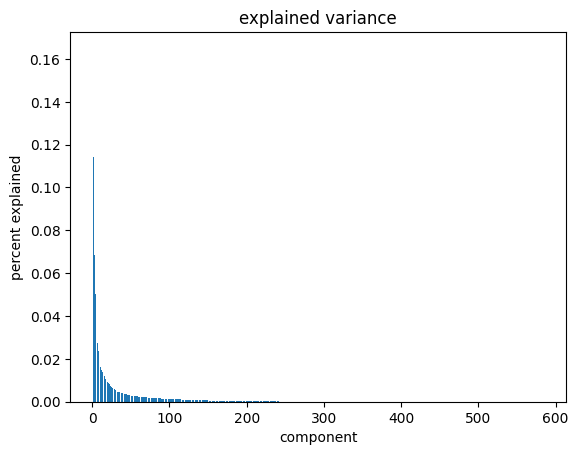

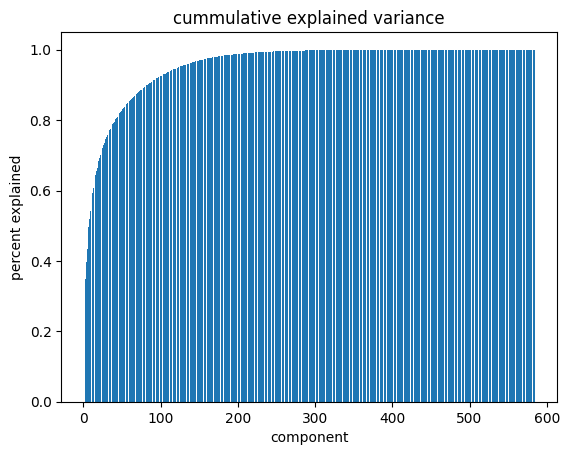

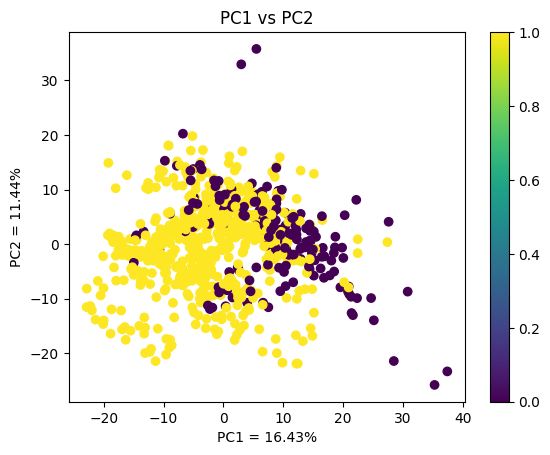

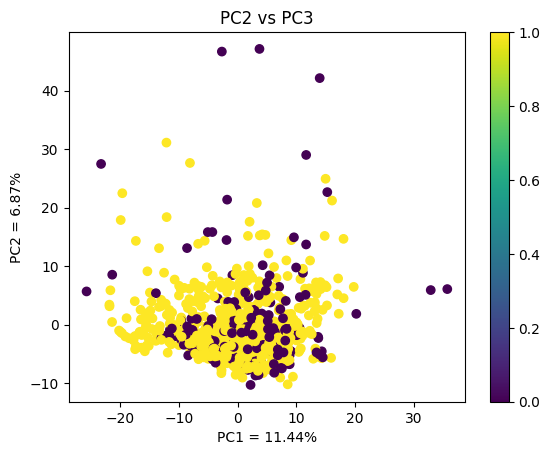

In [13]:
X = df[remaining_features].values
rpca = RunPCA(X, y)
rpca.run()

X = rpca.X

In PC1 vs PC2 we can see a separation of the classes, which is hopeful!

============================= I will now run a UMAP embedding on the PCA =============================

In [14]:
import umap

/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.

In [15]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)

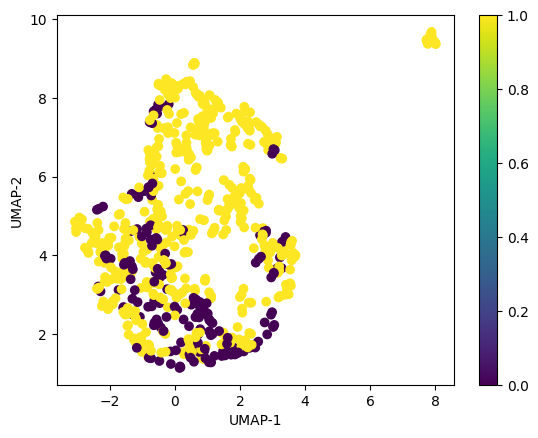

In [16]:
plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

============================= I will now find and remove some outliers =============================

I will remove outliers based on high "leverage" - which is the deviation of the sample in the feature space compared to the general clustering of the samples. They can be calculated via $H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$ for the i-th sample, and "high" happens for $H_{ii} > 2\bar{H_{ii}} = 2p/n$.

In [17]:
H = X@np.linalg.pinv(X.T@X)@X.T
Hii = np.diag(H)

In [20]:
out_thresh = 2*X.shape[1]/X.shape[0]
print(f"the threshold for high is: 2p/n = 2*{X.shape[1]}/{X.shape[0]} = {out_thresh} == {2*Hii.mean()} = 2*mean(H_ii)")

the threshold for high is: 2p/n = 2*584/756 = 1.5449735449735449 == 1.5423280423280423 = 2*mean(H_ii)


In [21]:
for ii in range(len(Hii)):
    print(ii, Hii[ii])

0 0.5717195389380331
1 0.6934512756365447
2 0.6468009502640779
3 0.9971436417749999
4 0.9923802275296669
5 0.9923554192816161
6 0.7613125319582732
7 0.7838978531203092
8 0.6872464228607673
9 0.6575469164363668
10 0.6676329321198888
11 0.5782296026766239
12 0.8237402475965002
13 0.669656760101468
14 0.6811902231307465
15 0.8658446885833249
16 0.7748697793895101
17 0.9256633938547278
18 0.7543964419184019
19 0.8033997452274466
20 0.6990619060620674
21 0.9177936024713473
22 0.9405706160795766
23 0.9970241902891595
24 0.820711306463272
25 0.9327293715740624
26 0.9142526533193556
27 0.6044331192783295
28 0.8804897164699892
29 0.5532036278293916
30 0.8179161774061752
31 0.9916453678745223
32 0.9948915839809918
33 0.7538866425227163
34 0.6901560844833465
35 0.7684076957270565
36 0.7363170890745716
37 0.7833661682168214
38 0.7880013998792459
39 0.808279508024724
40 0.9957064571414922
41 0.8087280739511947
42 0.6243788593088161
43 0.5771335917901158
44 0.5816067839707788
45 0.7017296993080582
4

In [22]:
# check = out_thresh
check = 0.99867

ind = list(np.where(Hii > check)[0])
print(type(ind))
print(ind)
print(len(ind), len(ind)/len(Hii))

<class 'list'>
[243, 244, 245, 562, 577, 726]
6 0.007936507936507936


There were no hits for the condition that $H_{ii} > 2\bar{H_{ii}} = 2p/n$, so I tweaked the threashold down to remove <~ 1% of the points, ie, the top 1% of the highest leverage points. Note that this still doesn't remove those two points above the main cluster in PC1 vs PC2... hmm... guess they aren't high leverage in the entire feature space.

In [23]:
# remove outliers and SAVE the df

df_outrmv = df.drop(index=ind).copy()
display(df_outrmv)
df_outrmv.to_csv(data_dir + '/pd_speech_features_reduced_outrmv.csv', index=None)
y = df_outrmv['class']

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.4394,3.0706,3.0190,3.1212,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,19.6733,1.9704,1.7451,1.8277,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,137.3126,51.5607,44.4641,26.1586,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,5.4425,19.1607,12.8312,8.9434,1.9496,1.9664,2.6801,2.8332,3.7131,0


Now redo the PCA to see what changed...

number of components = 586


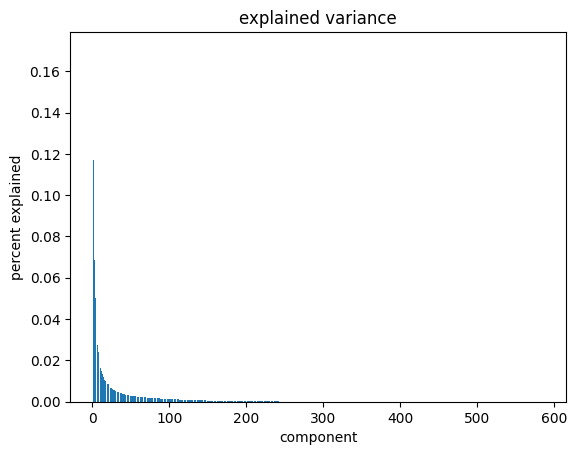

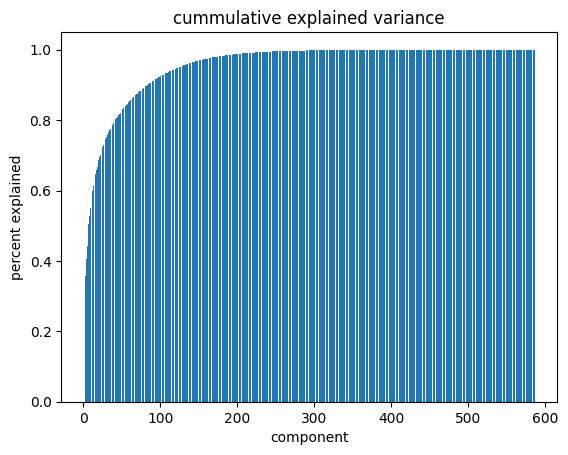

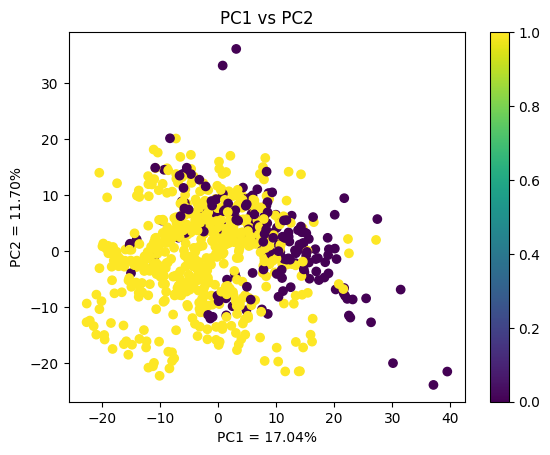

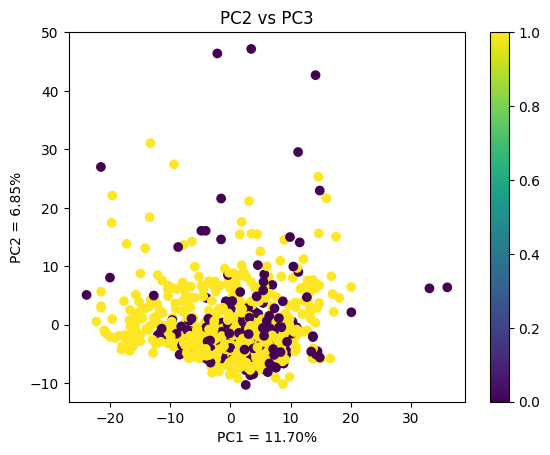

In [24]:
X = df_outrmv.values
rpca = RunPCA(X, y)
rpca.run()

============================= I will now balance the data for the neural net =============================

In [29]:
df_HC = df_outrmv[df_outrmv['class'] == 0]
df_PD = df_outrmv[df_outrmv['class'] == 1]

print(f"original num of HC =", len(df_HC))
print(f"original num of PD =", len(df_PD))

df_balanced = pd.concat([df_outrmv, df_HC.sample(n=len(df_PD)-len(df_HC), replace=True)]).reset_index(drop=True)
display(df_balanced)

print(f"num of HC =", len(df_balanced[df_balanced['class'] == 0]))
print(f"num of PD =", len(df_balanced[df_balanced['class'] == 1]))

original num of HC = 189
original num of PD = 561


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,221,0,0.86378,0.62732,0.56231,493,492,0.003918,0.000087,0.00089,...,2.8122,6.6572,3.7224,3.0976,2.5699,3.8843,3.5563,2.8401,3.2706,0
1118,216,0,0.78102,0.66945,0.40831,358,357,0.005388,0.000075,0.00112,...,123.0319,107.3453,86.8414,89.2767,44.3228,27.1005,18.2890,14.8293,5.2528,0
1119,194,0,0.82235,0.73729,0.31873,520,519,0.003714,0.000024,0.00059,...,41.3634,11.5115,6.5381,5.3690,5.8810,5.1919,5.7376,7.1185,5.6304,0
1120,11,1,0.80339,0.64898,0.33526,292,291,0.006608,0.002308,0.00202,...,142.2609,55.5652,20.6191,10.7380,4.0681,5.1861,5.1004,4.4758,5.3617,0


num of HC = 561
num of PD = 561


In [30]:
# SAVE the df from above

df_balanced.to_csv(data_dir + '/pd_speech_features_reduced_outrmv_balanced.csv', index=None)

In [ ]:
# F- I-- N---